In [1]:
from keras import layers
from keras import models
from keras import regularizers
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score
from sklearn.metrics import classification_report, confusion_matrix
from itertools import cycle
from tensorflow.python.client import device_lib
import itertools
from keras import backend as K
from keras import optimizers
from keras.layers.normalization import BatchNormalization
import tensorflow as tf
sess = tf.Session(config=tf.ConfigProto(log_device_placement=True))

print(device_lib.list_local_devices())
K.tensorflow_backend._get_available_gpus()

Using TensorFlow backend.


[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 9641061868291448581
]


[]

In [5]:
def getTargetNames(validation_generator):
    dictionary = validation_generator.class_indices
    result = []
    result_indexes = []
    for x in dictionary:
        #print(x)
        result.append(x)
        result_indexes.append(dictionary[x])
    return result, result_indexes

In [36]:
train_dir = "C:/Users/Canpolat/Documents/Uni/masterthesis/voter_Entwurf/Tomaten_Voter/train"
validation_dir = "C:/Users/Canpolat/Documents/Uni/masterthesis/voter_Entwurf/Tomaten_Voter/validation"
test_dir = "C:/Users/Canpolat/Documents/Uni/masterthesis/voter_Entwurf/Tomaten_Voter/test"

# Rescales all images by 1/255
#rain_datagen = ImageDataGenerator(rescale=1./255)
train_datagen = ImageDataGenerator(
    rescale=1./255,
    #rotation_range=40,
    #width_shift_range=0.2,
    #height_shift_range=0.2,
    #shear_range=0.2,
    #zoom_range=0.3,
    #horizontal_flip=True,
    #fill_mode='nearest'
)
#validation_datagen = ImageDataGenerator(rescale=1./255)
validation_datagen = ImageDataGenerator(
    rescale=1./255
)

test_datagen = ImageDataGenerator(
    rescale=1./255
)


train_generator = train_datagen.flow_from_directory(
    train_dir, # Target directory
    target_size=(150, 150), #Resizes all images to 150 × 150
    batch_size=32,
    class_mode='categorical') #Because you use binary_crossentropy loss, you need binary labels


validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='categorical',
    shuffle=False)

print(validation_generator.class_indices)
target_names, target_index = getTargetNames(validation_generator)


Found 2353 images belonging to 3 classes.
Found 674 images belonging to 3 classes.
Found 224 images belonging to 3 classes.
{'Early_blight': 0, 'Late_blight': 1, 'healthy': 2}


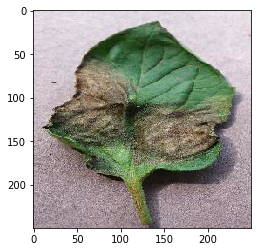

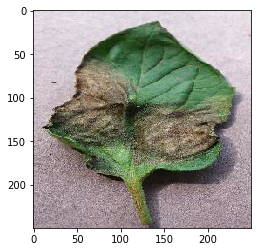

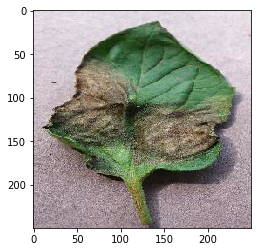

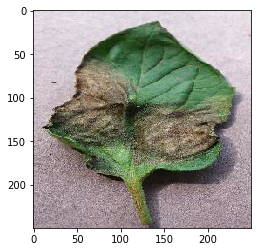

In [38]:
from keras.preprocessing import image
import os as os
train_dire = 'C:/Users/Canpolat/Desktop/a'
fnames = [os.path.join(train_dire, fname) for
fname in os.listdir(train_dire)]
img_path = fnames[0]
img = image.load_img(img_path, target_size=(250, 250))

x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0
for batch in train_datagen.flow(x, batch_size=1):
    plt.figure(i)
    imgplot = plt.imshow(image.array_to_img(batch[0]))
    i += 1
    if i % 4 == 0:
        break
plt.show()

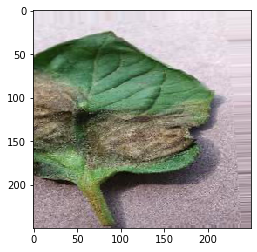

In [34]:
img = image.load_img('C:/Users/Canpolat/Desktop/a/a.JPG', target_size=(250, 250))
x = image.img_to_array(img)
x = x.reshape((1,) + x.shape)
i = 0

plt.figure(i)
imgplot = plt.imshow(image.array_to_img(b)

plt.show()